In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
train1_df = pd.read_csv('BATADAL_dataset03.csv', index_col=0)
# train2_df = pd.read_csv('BATADAL_dataset04.csv', index_col=0)
# test_df = pd.read_csv('BATADAL_test_dataset.csv', index_col=0)

# fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

<Figure size 1440x1280 with 0 Axes>

**Behaviour of T1**

F_PU1 and F_PU2 have the same flow while both pumps opened

PU2 closed:
    * F_PU2 discrases drastically to 0
    * F_PU1 increases over about 20
    * L_T1 dicreases
    * P_J269 dicreases -- pressure, as the total flow dicreases
    * P_J280 stayes on the same level
    
S_PU1 seems always opened and S_PU3 seems always closed

Frequency are different (within opening/closing the pumps)

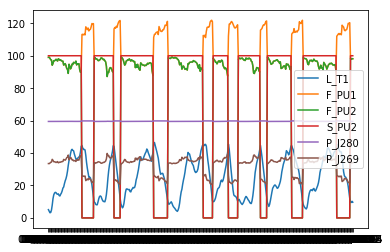

In [68]:
st = 0
it = st + 400
plt.plot(10*train1_df['L_T1'].iloc[st:it])
plt.plot(train1_df['F_PU1'].iloc[st:it])
plt.plot(train1_df['F_PU2'].iloc[st:it]) 
# plt.plot(train1_df['F_PU3'].iloc[st:it])
# plt.plot(120*train1_df['S_PU1'].iloc[st:it]) #seems always opened ?
plt.plot(100*train1_df['S_PU2'].iloc[st:it])
# plt.plot(100*train1_df['S_PU3'].iloc[st:it]) #seems always closed ?
plt.plot(20*train1_df['P_J280'].iloc[st:it]) # no correlation -- constant ??
plt.plot(train1_df['P_J269'].iloc[st:it])

plt.legend()
plt.show()

**Bahaviour of T5**

Mostly controlled by PU8, PU9 is not even in the rules


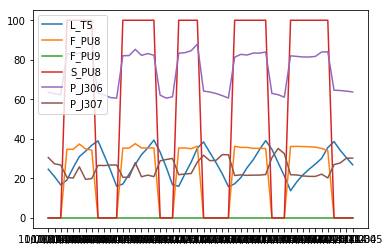

In [86]:
st = 100
it = st + 50
plt.plot(10*train1_df['L_T5'].iloc[st:it])
# plt.plot(20*train1_df['L_T7'].iloc[st:it])
plt.plot(train1_df['F_PU8'].iloc[st:it])
plt.plot(train1_df['F_PU9'].iloc[st:it]) # always closed -- to show though!
# plt.plot(train1_df['F_PU10'].iloc[st:it])
# plt.plot(train1_df['F_PU11'].iloc[st:it])

plt.plot(100*train1_df['S_PU8'].iloc[st:it])
# plt.plot(100*train1_df['S_PU9'].iloc[st:it]) # always closed
# plt.plot(100*train1_df['S_PU10'].iloc[st:it]) 
# plt.plot(100*train1_df['S_PU11'].iloc[st:it]) # always closed

# plt.plot(train1_df['P_J302'].iloc[st:it]) # no correlation
plt.plot(train1_df['P_J306'].iloc[st:it]) # this is for PU9

plt.plot(train1_df['P_J307'].iloc[st:it]) # from PU10 -> maybe??
# plt.plot(train1_df['P_J317'].iloc[st:it]) # 

plt.legend()
plt.show()

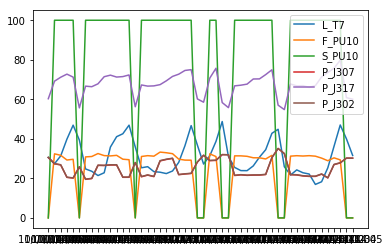

In [85]:
st = 100
it = st + 50
plt.plot(10*train1_df['L_T7'].iloc[st:it])

plt.plot(train1_df['F_PU10'].iloc[st:it])
# plt.plot(train1_df['F_PU11'].iloc[st:it])

plt.plot(100*train1_df['S_PU10'].iloc[st:it]) 
# plt.plot(100*train1_df['S_PU11'].iloc[st:it]) # always closed

plt.plot(train1_df['P_J307'].iloc[st:it]) # not much correlated! Sth must be affected by it! -> maybe PU8??
plt.plot(train1_df['P_J317'].iloc[st:it]) # 



plt.legend()
plt.show()

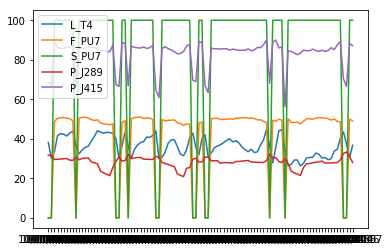

In [71]:
st = 100
it = st + 100
plt.plot(10*train1_df['L_T4'].iloc[st:it])

# plt.plot(train1_df['F_PU6'].iloc[st:it])
plt.plot(train1_df['F_PU7'].iloc[st:it])

# plt.plot(100*train1_df['S_PU6'].iloc[st:it])  # always closed
plt.plot(100*train1_df['S_PU7'].iloc[st:it])

plt.plot(train1_df['P_J289'].iloc[st:it]) # not much correlated! Sth must be affected by it! -> V2!
plt.plot(train1_df['P_J415'].iloc[st:it]) # 

plt.legend()
plt.show()

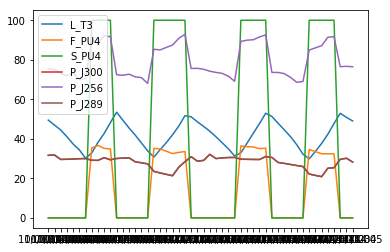

In [82]:
st = 100
it = st + 50
plt.plot(10*train1_df['L_T3'].iloc[st:it])

plt.plot(train1_df['F_PU4'].iloc[st:it])
# plt.plot(train1_df['F_PU5'].iloc[st:it])  # always closed

plt.plot(100*train1_df['S_PU4'].iloc[st:it]) 
# plt.plot(100*train1_df['S_PU5'].iloc[st:it])  # always closed

plt.plot(train1_df['P_J300'].iloc[st:it]) # not much correlated! Sth must be affected by it! -> V2
plt.plot(train1_df['P_J256'].iloc[st:it]) # is for PU5 though

plt.legend()
plt.show()

**Valve V2**

V2 opened 
    * P_J14 and P_J422 has same values
    * F_V2 raises drastically but the flow decreases (usually not steadily)
V2 closed P_J14 raises and P_J422 decreases
P_J422 and P_J289 (from PU6) strongly correlated (same values!)



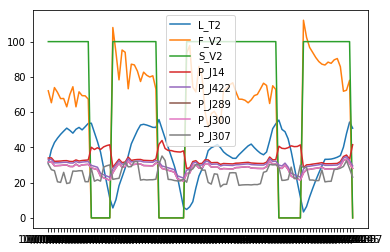

In [87]:
st = 100
it = st + 100
plt.plot(10*train1_df['L_T2'].iloc[st:it])

plt.plot(train1_df['F_V2'].iloc[st:it])

plt.plot(100*train1_df['S_V2'].iloc[st:it]) 

plt.plot(train1_df['P_J14'].iloc[st:it]) # 
plt.plot(train1_df['P_J422'].iloc[st:it]) # 

plt.plot(train1_df['P_J289'].iloc[st:it]) # from PU6

plt.plot(train1_df['P_J300'].iloc[st:it]) # from PU5



plt.legend()
plt.show()